# BibRec

### RF Features: Country, State, Age, Year-of-Publication

In [2]:
from bibrec.server.Utils import get_books, get_users, get_ratings

books = get_books("data/BX-Books.csv")
users = get_users("data/BX-Users.csv")
ratings = get_ratings("data/BX-Book-Ratings.csv")

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path, sep=";", encoding="latin-1")


With NaN values 34.862889904962536
used mean values 34.90229493117783


/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:38: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
explicit_ratings = ratings[ratings.book_rating != 0]
explicit_ratings

,user_id,isbn,book_rating,isbn13
1,276726,0155061224,5,9780155061224
3,276729,052165615X,3,9780521656153
4,276729,0521795028,6,9780521795029
6,276736,3257224281,8,9783257224283
7,276737,0600570967,6,9780600570967
...,...,...,...,...
1149771,276704,0743211383,7,9780743211383
1149773,276704,0806917695,5,9780806917696
1149775,276704,1563526298,9,9781563526299
1149777,276709,0515107662,10,9780515107661


In [5]:
df_ratings = explicit_ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
df_ratings = df_ratings[:1000]
df_ratings = df_ratings.reset_index()
# user_id => nr of ratings
df_ratings = df_ratings.drop('user_id',axis=1)
df_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780679781585
...,...
995,978038000148
996,9780671695071
997,9780684853529
998,9780394223803


In [6]:
df_ratings = df_ratings.merge(explicit_ratings, on='isbn13', how='left')
df_ratings

,isbn13,user_id,isbn,book_rating
0,9780316666343,277439,0316666343,7
1,9780316666343,277752,0316666343,7
2,9780316666343,278633,0316666343,9
3,9780316666343,638,0316666343,10
4,9780316666343,709,0316666343,3
...,...,...,...,...
68510,9780446679367,223787,0446679364,7
68511,9780446679367,226267,0446679364,8
68512,9780446679367,242574,0446679364,8
68513,9780446679367,260099,0446679364,4


In [7]:
# merge book dataset
df = df_ratings.merge(books[['isbn13', 'year_of_publication']])
df

,isbn13,user_id,isbn,book_rating,year_of_publication
0,9780316666343,277439,0316666343,7,2002.0
1,9780316666343,277752,0316666343,7,2002.0
2,9780316666343,278633,0316666343,9,2002.0
3,9780316666343,638,0316666343,10,2002.0
4,9780316666343,709,0316666343,3,2002.0
...,...,...,...,...,...
71362,9780446679367,223787,0446679364,7,2002.0
71363,9780446679367,226267,0446679364,8,2002.0
71364,9780446679367,242574,0446679364,8,2002.0
71365,9780446679367,260099,0446679364,4,2002.0


In [8]:
# merge user dataset
df = df_ratings.merge(users[['user_id', 'country', 'state', 'age']])
df

,isbn13,user_id,isbn,book_rating,country,state,age
0,9780316666343,277439,0316666343,7,usa,oregon,65.000000
1,9780671027360,277439,0671027360,7,usa,oregon,65.000000
2,9780316666343,277752,0316666343,7,usa,louisiana,18.000000
3,9780679734772,277752,0679734775,8,usa,louisiana,18.000000
4,9780316666343,278633,0316666343,9,usa,utah,28.501333
...,...,...,...,...,...,...,...
68510,9780394223803,271077,0394223802,10,canada,british columbia,49.000000
68511,9780446679367,15783,0446679364,6,usa,montana,35.882829
68512,9780446679367,129135,0446679364,8,NaN,oregon,40.599236
68513,9780446679367,204414,0446679364,9,usa,illinois,42.000000


In [9]:
country = pd.get_dummies(df['country'],drop_first=True)
country

,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,austria,bahamas,...,ysa,yugoslavia,zambia,zimbabwe,", denmark",", england, united kingdom",", malaysia",", mexico",", new zealand",", portugal"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
state = pd.get_dummies(df['state'],drop_first=True)
state

,&#322;ódzkie,(alacant),*,-,.,...,"\n/a\""",\n/a`,_,a coruña,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = pd.concat([df, country, state], axis = 1)
df

,isbn13,user_id,isbn,book_rating,country,state,age,"\n/a\"", greece""",albania,algeria,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,9780316666343,277439,0316666343,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780671027360,277439,0671027360,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780316666343,277752,0316666343,7,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780679734772,277752,0679734775,8,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,278633,0316666343,9,usa,utah,28.501333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,9780394223803,271077,0394223802,10,canada,british columbia,49.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,9780446679367,15783,0446679364,6,usa,montana,35.882829,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,9780446679367,129135,0446679364,8,NaN,oregon,40.599236,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,9780446679367,204414,0446679364,9,usa,illinois,42.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = df.loc[:,~df.columns.duplicated()]
df

,isbn13,user_id,isbn,book_rating,country,state,age,"\n/a\"", greece""",albania,algeria,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,9780316666343,277439,0316666343,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780671027360,277439,0671027360,7,usa,oregon,65.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780316666343,277752,0316666343,7,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780679734772,277752,0679734775,8,usa,louisiana,18.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,278633,0316666343,9,usa,utah,28.501333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,9780394223803,271077,0394223802,10,canada,british columbia,49.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,9780446679367,15783,0446679364,6,usa,montana,35.882829,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,9780446679367,129135,0446679364,8,NaN,oregon,40.599236,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,9780446679367,204414,0446679364,9,usa,illinois,42.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df = df.drop(['isbn', 'isbn13', 'user_id', 'country', 'state'], axis = 1)
df

,book_rating,age,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,7,65.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,65.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,28.501333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,10,49.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,6,35.882829,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,8,40.599236,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,9,42.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = df.drop('book_rating', axis = 1) #Features
X

,age,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,austria,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,65.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28.501333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,49.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68511,35.882829,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68512,40.599236,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68513,42.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y = df['book_rating']   # Target Variables
Y

0         7
1         7
2         7
3         8
4         9
         ..
68510    10
68511     6
68512     8
68513     9
68514     8
Name: book_rating, Length: 68515, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [17]:
rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, warm_start=True)

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       warm_start=True)

In [19]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred)*100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       118
           3       0.02      0.01      0.01       267
           4       0.02      0.01      0.01       384
           5       0.26      0.17      0.20      1767
           6       0.09      0.04      0.06      1523
           7       0.21      0.17      0.19      3345
           8       0.29      0.42      0.35      5230
           9       0.24      0.22      0.23      3829
          10       0.32      0.38      0.35      4001

    accuracy                           0.27     20555
   macro avg       0.15      0.14      0.14     20555
weighted avg       0.25      0.27      0.25     20555

26.859644855266357


Confusion matrix, without normalization
[[   0    1    2    2    3    3   11   30   16   23]
 [   0    0    1    2    3    8   15   48   23   18]
 [   0    2    2    2   19   11   43   88   37   63]
 [   5    2    3    2   19   14   70  130   60   79]
 [   5    2    8   16  298   71  237  598  227  305]
 [   1    4   11   15  113   61  271  563  240  244]
 [   3   11   15   18  162  146  574 1274  526  616]
 [   8    4   20   26  212  166  714 2203  875 1002]
 [   1    4   14   27  160  107  463 1376  854  823]
 [   4    5   12   15  152   79  357 1217  633 1527]]
Normalized confusion matrix
[[0.00e+00 1.10e-02 2.20e-02 2.20e-02 3.30e-02 3.30e-02 1.21e-01 3.30e-01
  1.76e-01 2.53e-01]
 [0.00e+00 0.00e+00 8.47e-03 1.69e-02 2.54e-02 6.78e-02 1.27e-01 4.07e-01
  1.95e-01 1.53e-01]
 [0.00e+00 7.49e-03 7.49e-03 7.49e-03 7.12e-02 4.12e-02 1.61e-01 3.30e-01
  1.39e-01 2.36e-01]
 [1.30e-02 5.21e-03 7.81e-03 5.21e-03 4.95e-02 3.65e-02 1.82e-01 3.39e-01
  1.56e-01 2.06e-01]
 [2.83e-03 1.13e-03 4

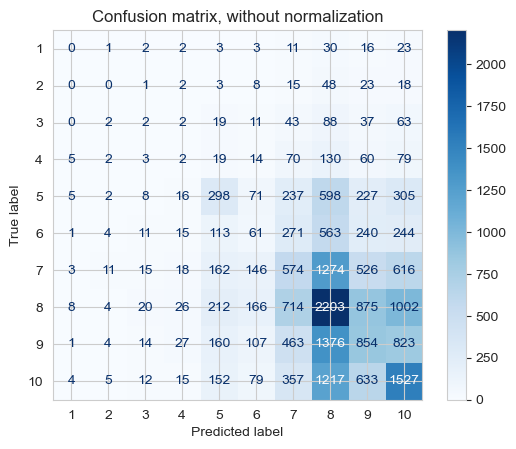

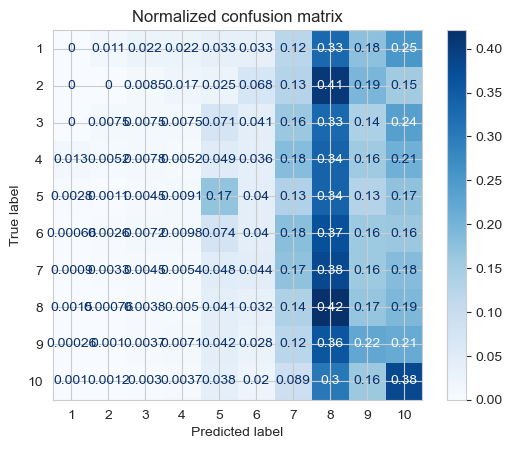

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [21]:
rfc.score(X_train, y_train)

0.49972894078398666

In [22]:
rfc.feature_importances_

array([8.71e-01, 2.66e-05, 0.00e+00, 0.00e+00, 9.41e-05, 1.02e-04,
       3.22e-05, 1.87e-04, 6.85e-04, 3.37e-04, 1.07e-04, 3.56e-05,
       8.62e-05, 2.69e-04, 2.99e-05, 7.02e-05, 2.79e-04, 5.71e-05,
       1.81e-04, 1.28e-04, 7.31e-05, 1.23e-03, 3.14e-05, 0.00e+00,
       4.20e-05, 4.56e-05, 8.22e-05, 3.05e-04, 0.00e+00, 2.97e-05,
       1.26e-04, 9.03e-05, 1.93e-04, 1.18e-04, 3.39e-04, 0.00e+00,
       2.37e-04, 0.00e+00, 2.32e-04, 0.00e+00, 2.55e-04, 8.97e-05,
       5.98e-05, 1.23e-04, 2.57e-04, 2.46e-04, 0.00e+00, 4.13e-04,
       6.93e-04, 9.54e-05, 2.25e-05, 0.00e+00, 1.53e-05, 3.83e-05,
       3.79e-05, 3.53e-04, 2.65e-05, 1.59e-04, 2.73e-05, 5.05e-05,
       9.37e-05, 1.48e-04, 0.00e+00, 1.48e-04, 0.00e+00, 1.72e-04,
       3.47e-04, 2.93e-04, 4.05e-04, 4.59e-05, 2.99e-04, 4.53e-05,
       1.22e-04, 1.33e-04, 2.09e-04, 9.35e-05, 5.15e-05, 5.59e-04,
       1.01e-04, 1.00e-04, 5.18e-05, 3.29e-05, 5.05e-05, 2.38e-04,
       1.02e-04, 0.00e+00, 0.00e+00, 0.00e+00, 1.64e-04, 4.31e